## Task for Data Scientist Position – Industry Cluster Bubble Charts
### Voinovich School of Leadership and Public Affairs/Ohio University
#### Author: Ziqi Xie  E-mail: zxietulane@gmail.com

This notebook is for data scientist position at the Voinovich School of Leadership and Public Affairs. The primary purpose is to create industry cluster bubble charts, which analyze the industries' comparative advantage of Ohio as well as the Adams County. The notebook is arranged as follows: Section 1 briefly discusses the industry cluster method; Section 2 introduces the data (since the data is NOT the actual data, I will present how I generate the dataset); Section 3 shows the charts along with essential description analysis; Section 4 concludes with a discussion on challenges.

### Section 1. Introduction

The industry cluster bubble chart provides an intuitive analysis of how the industries developed during the past few years for a specific region. It helps us as well as policymakers, understand the current status and development of the sectors in this region. Specifically, it involves two dimensions of analysis: location quotient analysis (LQ) and shift-share analysis(SS). LQ is calculated as follows:

$LQ = \frac{\frac{Regional\ Industry \ Employment}{Regional \ Total \ Employment}}{\frac{National \ Industry \ Employment}{National \ Total \ Employment}}$

Thus, if LQ is higher than one, the industry in this region has higher employment rate than the national level; if LQ is less than one, it indicates the industry may have less power in employment; if LQ equals one, the industry is the same with the national level. The shift-share analysis compares the sector with itself:

$SS = \frac{Current \ Job\# \ - \ Jobs\# \ (5yr ago)}{Jobs\# \ (5yr ago)}$

Therefore, if SS is greater than zero, the industry in this region is growing in the past five years; if SS is less than zero, it declined over the years. Now, let's combine the LQ and SS in one graph. 

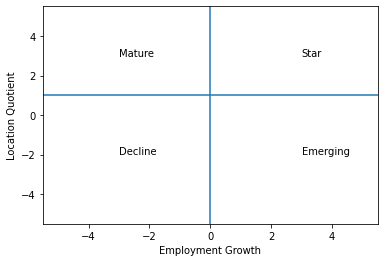

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#data Frame for X,Y
df1 = pd.DataFrame ({'x': range(-5, 6)})
df1['y']=(1*df1['x'])

plt.plot(df1.x, df1.y, color="None")
plt.xlabel('Employment Growth')
plt.ylabel('Location Quotient')
#axis lines for 0,0
plt.axhline(y=1)
plt.axvline()

plt.text(3,3,'Star')
plt.text(-3,3,'Mature')
plt.text(-3,-2, 'Decline')
plt.text(3,-2,'Emerging')
plt.show()

Based on the definition of LQ and SS, we can have industries placed in four quadrants: Top-right is for "star industries(LQ>1, SS>0); Top-left is for "mature" industries(LQ>1, SS<0, strong but declining); Bottom-left is for 'declining' industries(LQ<1, SQ<0, weak and falling); Botton-right is for 'emerging' industries(LS<1, SS>0, weak but growing). Within this graph in mind, we can start to cluster local industries in these four quadrants and analyze their strength and weakness.

### Section 2. Data

Since I do not have data of industries in Ohio and Adams County, I generate a sample dataset for demonstration purposes. 

In [2]:
# Set the seed so that the numbers can be reproduced.
np.random.seed(0)  
ai1=['lq'] #analysis indicator ls
ai2=['ss'] #analysis indicator ss
emp=['emp']#no. of jobs
ind=['ind'] #industry code (ranges from 1-5)

df_ai11 = pd.DataFrame(-2 + 6*np.random.randn(5000,1), columns=ai1)
df_ai12 = pd.DataFrame(-1 + 4*np.random.randn(5000,1), columns=ai2)
df_emp1 = pd.DataFrame(np.random.randint(1000,5000,(5000,1)), columns=emp)
df_ind1 = pd.DataFrame(np.random.randint(1,6,(5000,1)), columns=ind)
df1 = pd.concat([df_ai11, df_ai12, df_emp1, df_ind1], axis=1)
df1['state']='Ohio'
df1['county']='Adams'

df_ai21 = pd.DataFrame(-2 + 6*np.random.randn(5000,1), columns=ai1)
df_ai22 = pd.DataFrame(-1 + 4*np.random.randn(5000,1), columns=ai2)
df_emp2 = pd.DataFrame(np.random.randint(1000,5000,(5000,1)), columns=emp)
df_ind2 = pd.DataFrame(np.random.randint(1,6,(5000,1)), columns=ind)
df2 = pd.concat([df_ai21, df_ai22, df_emp2, df_ind2], axis=1)
df2['state']='Ohio'
df2['county']='Pike'

df_full=df1.append(df2)
df_full.to_csv("industry.csv")

The data can be downloaded [here](https://github.com/zxecon/python/blob/master/industry.csv). I have also attached the data in the e-mail. First, let's look at the data.

In [3]:
industry_df = pd.read_csv("/Users/zxie/Dropbox/cluster/industry.csv")
industry_df.head()

,Unnamed: 0,lq,ss,emp,ind,state,county
0,0,8.584314,0.238895,4084,2,Ohio,Adams
1,1,0.400943,-3.949825,2552,3,Ohio,Adams
2,2,3.872428,-7.147680,2940,1,Ohio,Adams
3,3,11.445359,-3.249019,2441,3,Ohio,Adams
4,4,9.205348,-7.398044,2483,5,Ohio,Adams


In [4]:
industry_df.describe()

,Unnamed: 0,lq,ss,emp,ind
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2499.500000,-2.028716,-1.038673,3006.209800,2.996200
std,1443.447818,5.962566,4.001245,1161.623652,1.407545
min,0.000000,-24.440604,-17.845081,1000.000000,1.000000
25%,1249.750000,-6.109291,-3.680474,2001.750000,2.000000
50%,2499.500000,-1.984134,-1.056515,3002.000000,3.000000
75%,3749.250000,1.946252,1.634423,4025.000000,4.000000
max,4999.000000,21.383910,14.997987,4999.000000,5.000000


In this dataset, we have industries' lq and ss information for two countries in Ohio, Adams, and Pike. As we mentioned above, lq and ss represent location quotient analysis and shift-share analysis, respectively. Emp is the number of employees for each firm. The ind indicates the industry codes, which ranges from 1 to 5 for five different industries. Thus, for the next step, we will start to drat the industry cluster bubble charts for Ohio as well as the Adams County. Each state has 5,000 observations. Thus, Ohio has a total of 10,000 observations.

### Section 3. The Industry Cluster Bubble Charts

Since we would like to know the distribution of the industry clusters, we need to calculate the average of lq and ss for each industry. The mean of lq and ss is calculated as follows:

In [5]:
df_mean = industry_df.groupby(by = 'ind').mean()
df_mean.head()

,Unnamed: 0,lq,ss,emp
ind,,,,
1,2462.110611,-1.983086,-0.974356,2964.719219
2,2500.433182,-2.045406,-1.071684,2990.573374
3,2520.370370,-2.101630,-1.100462,3052.081481
4,2493.459209,-1.983522,-0.975923,2984.434783
5,2521.562917,-2.030224,-1.072761,3039.896764


In [6]:
df_mean_Adams = df1.groupby(by = 'ind').mean()
df_mean_Adams.head()

,lq,ss,emp
ind,,,
1,-2.150623,-0.834014,2946.756122
2,-2.087895,-1.279593,2994.867327
3,-2.314774,-1.252373,3053.649000
4,-1.895107,-0.968003,2999.231454
5,-1.996667,-1.103184,3022.011011


Now we need to plot the 'bubble' of the clustered industry. The following graphs show the industry cluster bubbles for Ohio and Adams county.

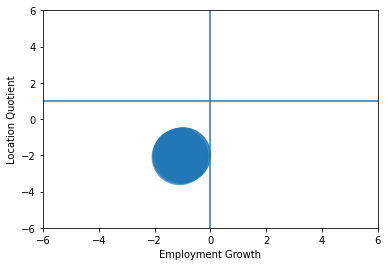

In [7]:
size = df_mean['emp']
plt.scatter(df_mean['ss'], df_mean['lq'], s=size, alpha=0.6)  # scatters, alpha for opacit
plt.ylim([-6, 6])  
plt.xlim([-6, 6])   
plt.axhline(y=1)
plt.axvline()
plt.xlabel('Employment Growth')  
plt.ylabel('Location Quotient')  
plt.show()

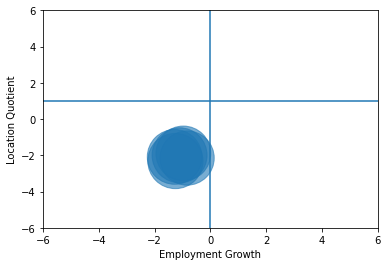

In [8]:
size = df_mean_Adams['emp']
plt.scatter(df_mean_Adams['ss'], df_mean_Adams['lq'], s=size, alpha=0.6)  # scatters, alpha for opacit
plt.ylim([-6, 6])  
plt.xlim([-6, 6])  
plt.axhline(y=1)
plt.axvline()
plt.xlabel('Employment Growth')  
plt.ylabel('Location Quotient')  
plt.show()

Since I create the dataset with random numbers for all the variables, it is no surprise that the 'bubbles' overlap with each other. Thus, previous codes explain how we manipulate the dataset to make the industry cluster bubble charts. Next, I will create a fake sample for Ohio and Adams County to help with the analysis.

In [9]:
from pandas import Series,DataFrame
#Ohio data
data_Ohio = {'ind':['Finance','Mining','IT/Telecom','Textiles','Biotech'],
        'emp':[1900,2532,8900,3423,1256],
       'lq':[-1.4,3.7,4.9,-1.3,0.6],
       'ss':[-7,-1.3,5.9,3.9,0.9]}
df_Ohio = DataFrame(data_Ohio)
df_Ohio.head()

,ind,emp,lq,ss
0,Finance,1900,-1.4,-7.0
1,Mining,2532,3.7,-1.3
2,IT/Telecom,8900,4.9,5.9
3,Textiles,3423,-1.3,3.9
4,Biotech,1256,0.6,0.9


In [10]:
#Adams county data
data_Adams = {'ind':['Finance','Mining','IT/Telecom','Textiles','Biotech'],
        'emp':[1900,2532,8900,3423,1256],
       'lq':[2.9,-3.7,-4.9,7,1],
       'ss':[-3,-1.3,5.9,5,1.7]}
df_Adams = DataFrame(data_Adams)
df_Adams.head()

,ind,emp,lq,ss
0,Finance,1900,2.9,-3.0
1,Mining,2532,-3.7,-1.3
2,IT/Telecom,8900,-4.9,5.9
3,Textiles,3423,7.0,5.0
4,Biotech,1256,1.0,1.7


Following previous codes, we re-draw the industry cluster bubble charts for Ohio and Adams county as follows:

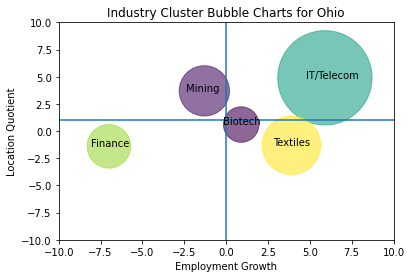

In [11]:
#Ohio industry cluster bubble charts
colors=np.random.rand(5) #set bubble color
x = df_Ohio['ss']
y = df_Ohio['lq']
txt = df_Ohio['ind']
size = df_Ohio['emp']
ax = plt.scatter(x, y, s=size, c=colors, alpha=0.6)  # scatters, alpha for opacit
plt.ylim([-10, 10])  
plt.xlim([-10, 10])  
plt.axhline(y=1)
plt.axvline()
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]-1.1, y[i]))
plt.title('Industry Cluster Bubble Charts for Ohio')
plt.xlabel('Employment Growth')      
plt.ylabel('Location Quotient')  
plt.show()

Among all of the five industries, we can see that the IT/Telecommunication employs the most people and have a relatively higher location quotient compared with the national level. Also, over the past five years, IT/Telecommunication had the highest employment growth rate among all industries. On the opposite is the Finance industry, which can be considered as the declining industry in the state. Besides, mining is a mature industry across the state. We should note that Biotch and Textile are rising over the past five years.

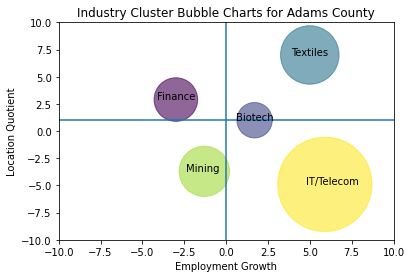

In [12]:
#Adams county industry cluster bubble charts
colors=np.random.rand(5) #set bubble color
x = df_Adams['ss']
y = df_Adams['lq']
txt = df_Adams['ind']
size = df_Adams['emp']
ax = plt.scatter(x, y, s=size, c=colors, alpha=0.6)  # scatters, alpha for opacit
plt.ylim([-10, 10])  
plt.xlim([-10, 10])  
plt.axhline(y=1)
plt.axvline()
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]-1.1, y[i]))
plt.title('Industry Cluster Bubble Charts for Adams County')
plt.xlabel('Employment Growth')      
plt.ylabel('Location Quotient')  
plt.show()

Now we turn to Adams County. The star industry becomes Textile, and the IT/Telecommunication is emerging(with the highest employment growth). We may expect to see IT/Telecommunication becomes the star industry of the Adams county as the Ohio state. Finance is the mature industry, and Mining is declining. Pretty similar to the situation over the Ohio state, Textile, Biotech, and IT/Telecommunication are up-and-coming industries. 

### Section 4. Discussion of Challenges

The industry cluster bubble chart is a useful way to provide intuitive analysis for local economic development. Even though I have studied economics for years, it is the first time for me to draw the graphs. The challenges are mainly in two ways. First, I need to get familiar with the method, understand the economic meaning of the bubble chart, and provide detailed analysis based on the results I get from the hypothetical data. 
Second, since I do not have the actual data for each industry, it is hard to provide accurate graphs and make a precise analysis. Even though I present my codes on how to group the observations by industry and draw the graphs, I only get figures with overlapped 'bubbles' due to the randomly distributed setting of lq, ss, and the number of jobs. Thus, at last, I have to create hypothetical values for Ohio and Adams county. 